In [5]:
from domino.data_sources import DataSourceClient

# instantiate a client and fetch the datasource instance
ds = DataSourceClient().get_datasource("Snowflake_Data_Source")

# res is a simple wrapper of the query result
res = ds.query("select * from wine_quality_data")

# to_pandas() loads the result into a pandas dataframe
df = res.to_pandas()
df

,ID,TYPE,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY
0,0,white,7.0,0.27,0.36,20.7,0.05,45.0,170.0,1.00,3.00,0.45,8.8,5.58
1,1,white,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,5.04
2,2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,5.34
3,3,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,4.92
4,4,white,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,5.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,red,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5.60
6493,6493,red,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,NaN,11.2,4.92
6494,6494,red,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6.18
6495,6495,red,5.9,0.65,0.12,2.0,0.08,32.0,44.0,1.00,3.57,0.71,10.2,5.65


<Axes: >

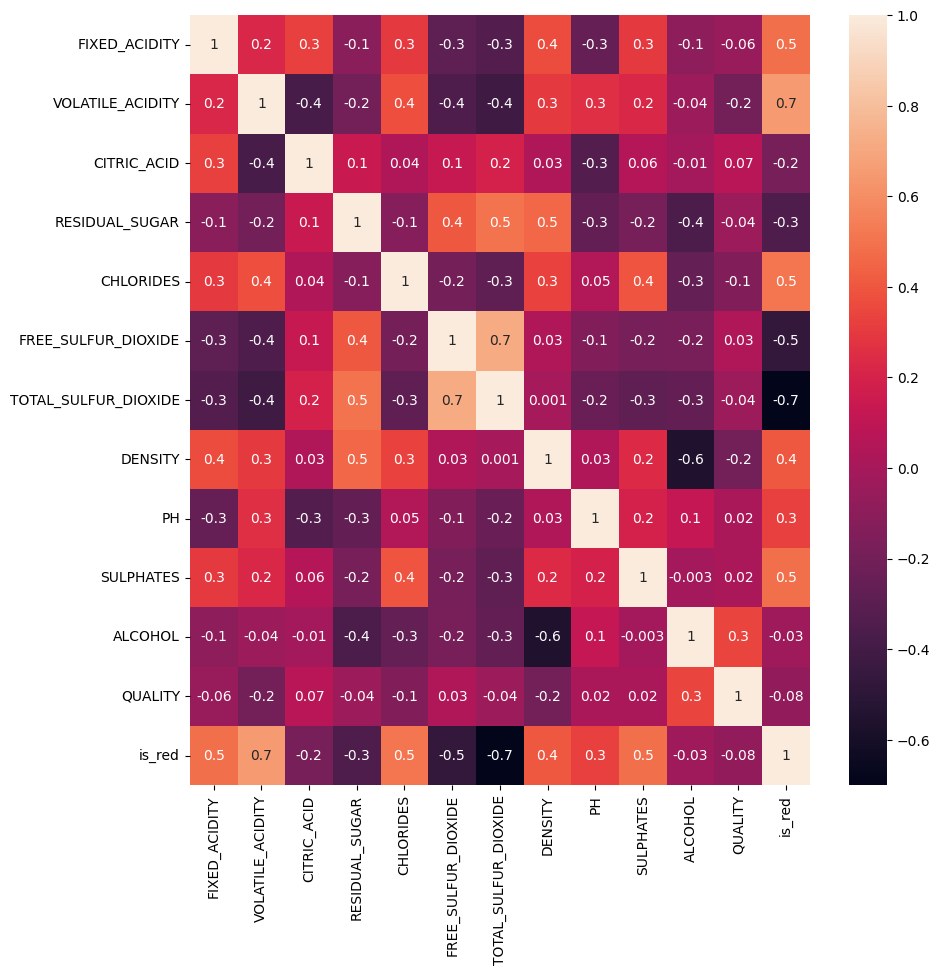

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df['is_red'] = df.TYPE.apply(lambda x : int(x=='red'))
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt='.1g')

VOLATILE_ACIDITY   -0.199503
DENSITY            -0.197809
CHLORIDES          -0.147208
is_red             -0.080618
ALCOHOL             0.341582
Name: QUALITY, dtype: float64


<Axes: title={'center': 'Feature Importance for Wine Quality'}, ylabel='Pearson Correlation'>

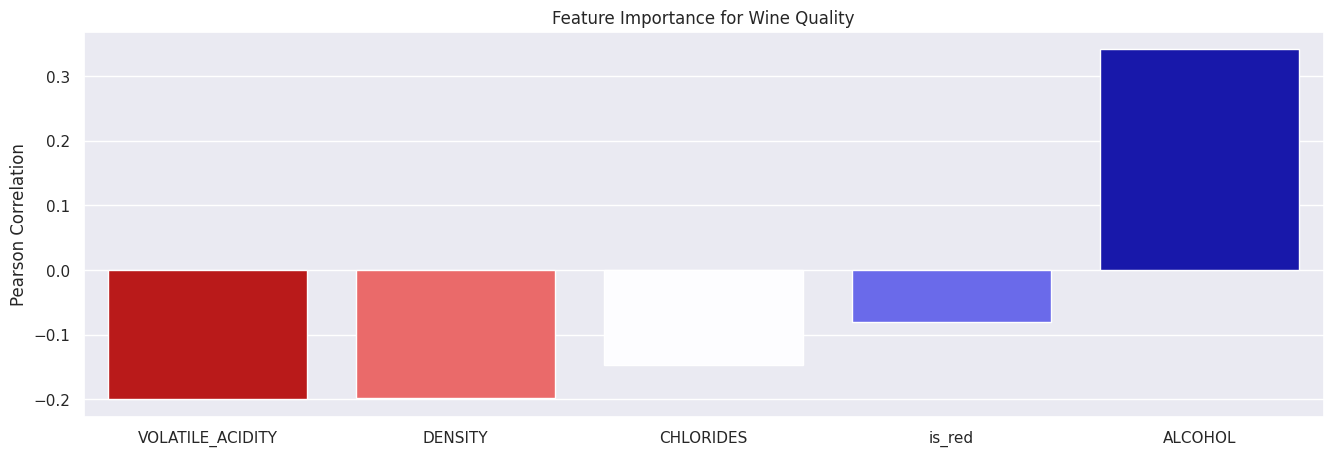

In [9]:
corr_values = df.corr(numeric_only=True).sort_values(by = 'QUALITY')['QUALITY'].drop('QUALITY',axis=0)
important_feats=corr_values[abs(corr_values)>0.08]
print(important_feats)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,5))
plt.title('Feature Importance for Wine Quality')
plt.ylabel('Pearson Correlation')
sns.barplot(x=important_feats.keys(), y=important_feats.values, palette='seismic_r')